This project involves analyzing and predicting delays in flight departures using a synthetic dataset. The tasks include data cleaning, exploration of individual variables, bivariate data exploration, data transformation, and data modeling.
*   Section 1 Data Cleaning Tasks covers tasks 1-2
*   Section 2 Data Exploration Tasks - Statistics of individual variables covers tasks 3 and 4
*   Section 3 Bivariate Data Exploration Tasks covers tasks 5-7
*   Section 4 Data Transformation Tasks covers tasks 8-10
*   Section 5 Data Modelling Tasks covers tasks 11 and 12
*   Section 6 Professional, legal and ethical considerations Tasks covers tasks 13

In [ ]:
# Install packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import statistics as stat
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.preprocessing import scale

In [ ]:
df = pd.read_csv("/content/flights.csv")#upload file flights.csv
df.head()

,Delay,Load,Wind,Temp,Turnaround,ArrDep,WindDir,Precip,Date,SchDepTime,Terminal,Delayed,Airport
0,31.3,71.3%,12.6,-7.0,1H 4M,2,E,snowice,01-Jan-21,14:10,T2,yes,Aberdeen
1,0.0,62.6%,3.2,-5.2,1H 38M,0,S,none,02-Jan-21,14:10,T1,no,Aberdeen
2,16.2,88.3%,NaN,NaN,1H 18M,2,S,rain,03-Jan-21,06:55,T1,yes,Aberdeen
3,5.3,78.6%,3.7,-8.2,1H 9M,4,S,snowice,04-Jan-21,06:55,T2,yes,Aberdeen
4,57.4,76.9%,11.4,-0.6,1H 6M,2,W,snowice,05-Jan-21,14:10,T1,yes,Aberdeen


In [ ]:
df.shape# shape property shows the (rows, columns) so we have 739 rows, and 13 columns

(739, 13)

In [ ]:
df.info()#examine data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Delay       739 non-null    float64
 1   Load        739 non-null    object 
 2   Wind        723 non-null    float64
 3   Temp        723 non-null    float64
 4   Turnaround  739 non-null    object 
 5   ArrDep      739 non-null    int64  
 6   WindDir     739 non-null    object 
 7   Precip      739 non-null    object 
 8   Date        739 non-null    object 
 9   SchDepTime  739 non-null    object 
 10  Terminal    739 non-null    object 
 11  Delayed     739 non-null    object 
 12  Airport     739 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 75.2+ KB


## Section 1 Data Cleaning Tasks:


### 1(a) Detect missing values

In [ ]:
df.isna().value_counts()


Delay  Load   Wind   Temp   Turnaround  ArrDep  WindDir  Precip  Date   SchDepTime  Terminal  Delayed  Airport
False  False  False  False  False       False   False    False   False  False       False     False    False      723
              True   True   False       False   False    False   False  False       False     False    False       16
dtype: int64

In [ ]:
df1 = df.dropna(how = 'all')#remove only completely missing rows in a DataFrame
df1.dropna(axis=1, how = 'all')#remove only completely missing columns in a DataFrame
df1.isna().value_counts()

Delay  Load   Wind   Temp   Turnaround  ArrDep  WindDir  Precip  Date   SchDepTime  Terminal  Delayed  Airport
False  False  False  False  False       False   False    False   False  False       False     False    False      723
              True   True   False       False   False    False   False  False       False     False    False       16
dtype: int64

In [ ]:
df2 =df1.interpolate(method='linear')#fill missing values  with values computed as a linear function of the neighboring data points
df2.head()


,Delay,Load,Wind,Temp,Turnaround,ArrDep,WindDir,Precip,Date,SchDepTime,Terminal,Delayed,Airport
0,31.3,71.3%,12.60,-7.0,1H 4M,2,E,snowice,01-Jan-21,14:10,T2,yes,Aberdeen
1,0.0,62.6%,3.20,-5.2,1H 38M,0,S,none,02-Jan-21,14:10,T1,no,Aberdeen
2,16.2,88.3%,3.45,-6.7,1H 18M,2,S,rain,03-Jan-21,06:55,T1,yes,Aberdeen
3,5.3,78.6%,3.70,-8.2,1H 9M,4,S,snowice,04-Jan-21,06:55,T2,yes,Aberdeen
4,57.4,76.9%,11.40,-0.6,1H 6M,2,W,snowice,05-Jan-21,14:10,T1,yes,Aberdeen


### 1(b) Detect duplicate rows

In [ ]:
df2.duplicated().value_counts()

False    730
True       9
dtype: int64

In [ ]:
df3 = df2.drop_duplicates() ## drop entirely duplicated rows using drop_duplicates function
df3.duplicated().value_counts()

False    730
dtype: int64

###2(a) Convert the Load column into numerical format

In [ ]:
load_new = df3['Load'].str.replace('%','').astype(float)	# replace % with empty text and convert to numerical type
df4 = df3.assign(Load=load_new)			# add new column to DataFrame
df4.head()

,Delay,Load,Wind,Temp,Turnaround,ArrDep,WindDir,Precip,Date,SchDepTime,Terminal,Delayed,Airport
0,31.3,71.3,12.60,-7.0,1H 4M,2,E,snowice,01-Jan-21,14:10,T2,yes,Aberdeen
1,0.0,62.6,3.20,-5.2,1H 38M,0,S,none,02-Jan-21,14:10,T1,no,Aberdeen
2,16.2,88.3,3.45,-6.7,1H 18M,2,S,rain,03-Jan-21,06:55,T1,yes,Aberdeen
3,5.3,78.6,3.70,-8.2,1H 9M,4,S,snowice,04-Jan-21,06:55,T2,yes,Aberdeen
4,57.4,76.9,11.40,-0.6,1H 6M,2,W,snowice,05-Jan-21,14:10,T1,yes,Aberdeen


In [ ]:
print(df4['Load'].dtype)# check the type of the Load column

float64


### 2(b) Convert the Turnaround column into numerical format

In [ ]:
turnaround = df4['Turnaround']
turnaround = turnaround.str.replace("H","").str.replace("M","")
turnaround_new = turnaround.str.split(" ", expand = True)
turnaround_new.columns = ['H','M']
hours = pd.to_numeric(turnaround_new['H'])
minutes = pd.to_numeric(turnaround_new['M'])
df4['Turnaround'] = hours*60 + minutes
## Check that new column is numerical by e.g. calculating its statistics
df4['Turnaround'].describe()

count    730.000000
mean      89.993151
std       26.258684
min       17.000000
25%       71.250000
50%       91.000000
75%      107.000000
max      158.000000
Name: Turnaround, dtype: float64

In [ ]:
df4.head()

,Delay,Load,Wind,Temp,Turnaround,ArrDep,WindDir,Precip,Date,SchDepTime,Terminal,Delayed,Airport
0,31.3,71.3,12.60,-7.0,64,2,E,snowice,01-Jan-21,14:10,T2,yes,Aberdeen
1,0.0,62.6,3.20,-5.2,98,0,S,none,02-Jan-21,14:10,T1,no,Aberdeen
2,16.2,88.3,3.45,-6.7,78,2,S,rain,03-Jan-21,06:55,T1,yes,Aberdeen
3,5.3,78.6,3.70,-8.2,69,4,S,snowice,04-Jan-21,06:55,T2,yes,Aberdeen
4,57.4,76.9,11.40,-0.6,66,2,W,snowice,05-Jan-21,14:10,T1,yes,Aberdeen


## Section 2 Data Exploration Tasks - Statistics of individual variables:


### 3.Statistics of Individual Numerical Variables

mean =  12.206027397260275 
median =  7.3 
min =  0.0 
max =  89.0 
range =  89.0 
standard deviation =  15.414698839128569 
skewness =  1.6614250844995588 
kurtosis =  3.2991015073433356


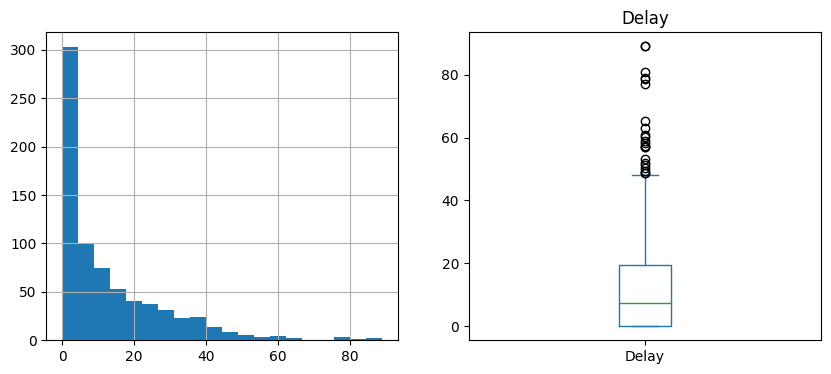

In [ ]:
# Examine distribution and statistics of Delay
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df4['Delay'].hist(bins = 20, ax = ax[0])
df4['Delay'].plot.box(title = 'Delay', ax = ax[1])

print("mean = ", df4['Delay'].mean(),"\nmedian = ",df4['Delay'].median(),
      "\nmin = ",df4['Delay'].min(), "\nmax = ",df4['Delay'].max(),
      "\nrange = ", df4['Delay'].max()-df4['Delay'].min(),
      "\nstandard deviation = ",df4['Delay'].std(),
      "\nskewness = ", df4['Delay'].skew(),"\nkurtosis = ",df4['Delay'].kurtosis())

*   The range of delays is 89, indicating that the minimum delay is 0 and the maximum delay is 89. The standard deviation 15.4 indicates wide spread of data points around the mean.
*   The mean delay is 12.2, which is higher than the median delay of 7.3. This suggests that there are some longer delays that contribute to the higher mean,
*   The skewness value of 1.6 confirms the positive skewness of the distribution. The kurtosis value of 3.3 indicates that the distribution has heavier tails and is more peaked compared to a normal distribution.
*   Boxplot and positive skewness value indicate more outliers of high rating than of low rating.






mean =  5.713356164383562 
median =  5.2 
min =  -9.2 
max =  29.1 
range =  38.3 
standard deviation =  8.379881295782722 
skewness =  0.31038838326335677 
kurtosis =  -0.6129620437264984


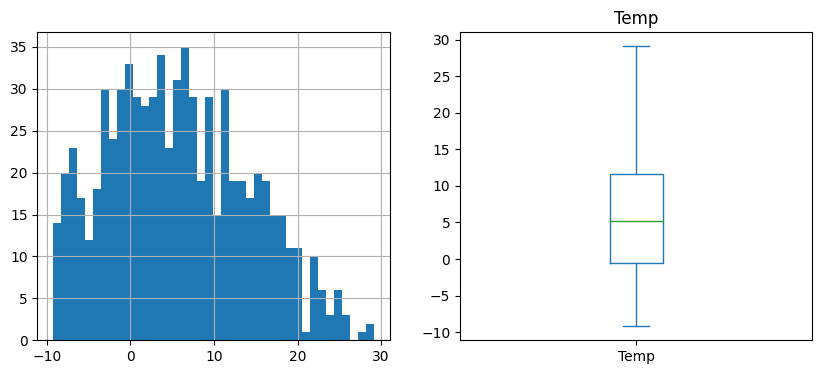

In [ ]:
# Examine distribution and statistics of Temp
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df4['Temp'].hist(bins = 40, ax = ax[0])
df4['Temp'].plot.box(title = 'Temp', ax = ax[1])

print("mean = ", df4['Temp'].mean(),"\nmedian = ",df4['Temp'].median(),
      "\nmin = ",df4['Temp'].min(), "\nmax = ",df4['Temp'].max(),
      "\nrange = ", df4['Temp'].max()-df4['Temp'].min(),
      "\nstandard deviation = ",df4['Temp'].std(),
      "\nskewness = ", df4['Temp'].skew(),"\nkurtosis = ",df4['Temp'].kurtosis())

*   The range of Temp is 38.3, indicating that the minimum temperature is -9.2 and the maximum  is 29.1. The standard deviation 8.4 indicates wide spread of data points around the mean.
*   The mean Temp is 5.7, which is close to median 5.2 This means data has fairly normal distribution
*   The skewness value of 0.3  indicating a slight deviation from perfect symmetry but still relatively close to a normal distribution. The kurtosis value of -0.6 indicates that the distribution has some tails and is less peaked compared to a normal distribution.


mean =  3.993150684931507 
median =  4.0 
min =  0 
max =  13 
range =  13 
standard deviation =  2.1561045989781626 
skewness =  0.5943006542638358 
kurtosis =  0.36458698013493906


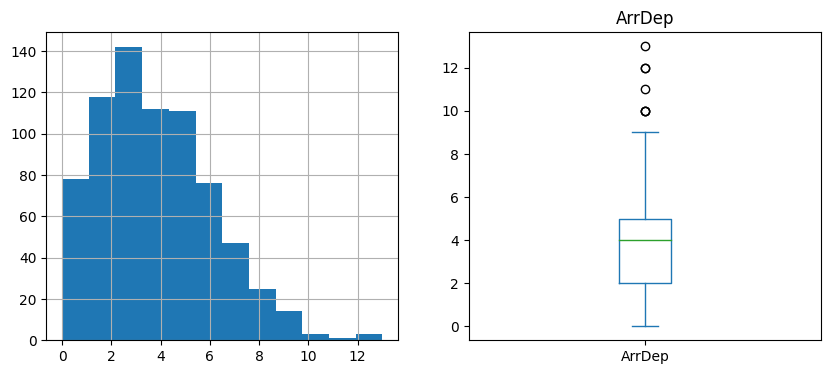

In [ ]:
# Examine distribution and statistics of ArrDep
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df4['ArrDep'].hist(bins = 12, ax = ax[0])
df4['ArrDep'].plot.box(title = 'ArrDep', ax = ax[1])

print("mean = ", df4['ArrDep'].mean(),"\nmedian = ",df4['ArrDep'].median(),
      "\nmin = ",df4['ArrDep'].min(), "\nmax = ",df4['ArrDep'].max(),
      "\nrange = ", df4['ArrDep'].max()-df4['ArrDep'].min(),
      "\nstandard deviation = ",df4['ArrDep'].std(),
      "\nskewness = ", df4['ArrDep'].skew(),"\nkurtosis = ",df4['ArrDep'].kurtosis())

*   The range of ArrDep is 13, indicating that the minimum delay is 0 and the maximum delay is 13. The standard deviation 2.2 indicates a low spread of data points around the mean.
*   The mean Temp is 3.9, which is close to median 4.0 This means data has fairly normal distribution,
*   The skewness value of 0.59 confirms the slite positive skewness of the distribution. The kurtosis value of 0.36 indicates that the distribution has lihhter tails  compared to a normal distribution.
*   Boxplot and positive skewness value indicate more outliers of high rating than of low rating.

### 4.Statistics of Individual Categorical Variables

         Number  Percentage
none        365        50.0
rain        289        39.6
snowice      76        10.4


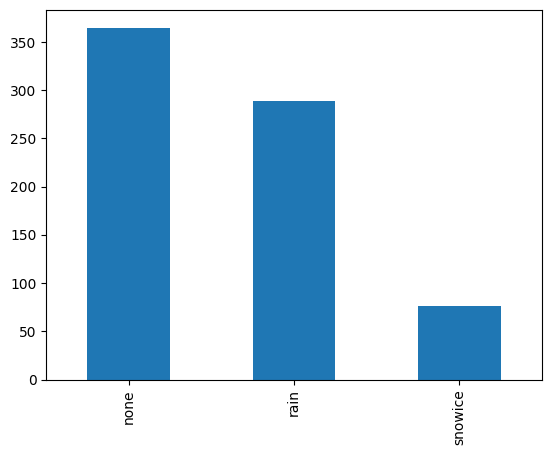

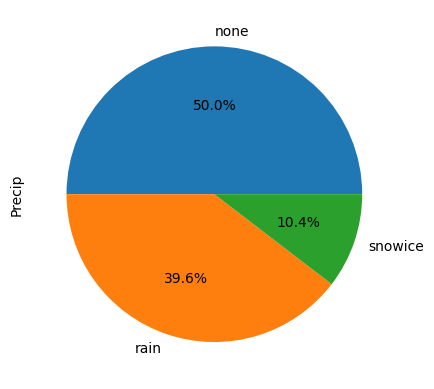

In [ ]:
## Examine distribution and statistics of Precip
Precip = pd.DataFrame({'Number':df4['Precip'].value_counts(),
                   'Percentage': 100*df4['Precip'].value_counts(normalize = True).round(3)})
print(Precip)
df4['Precip'].value_counts().plot.bar()
plt.show()
df4['Precip'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

*   Higher proportion 50 % have none Precip, than rain 39,6% and lowest 10.4% snowice




     Number  Percentage
yes     427        58.5
no      303        41.5


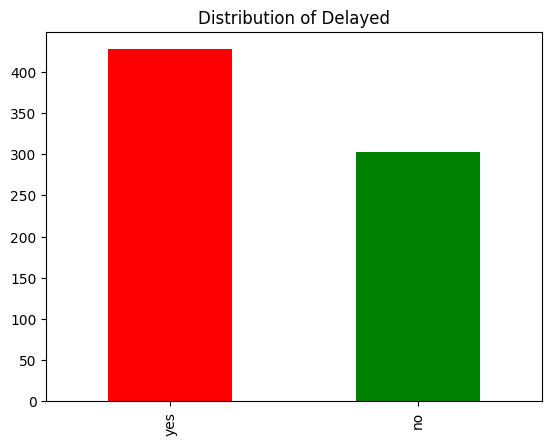

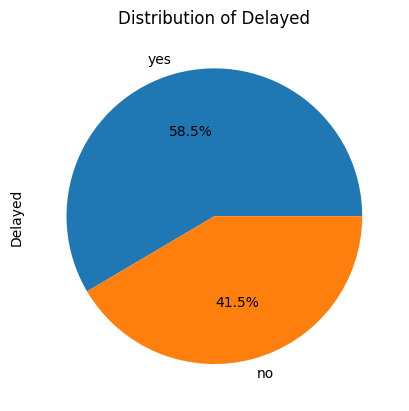

In [ ]:
## Examine distribution and statistics of Delayed
# we can count the number of occurences in each category
Delayed = pd.DataFrame({'Number':df4['Delayed'].value_counts(),
                   'Percentage': 100*df4['Delayed'].value_counts(normalize = True).round(3)})
print(Delayed)
df4['Delayed'].value_counts().plot.bar(title = "Distribution of Delayed", color=df4['Delayed'].map({'yes': 'red', 'no': 'green'}))
plt.show()
df4['Delayed'].value_counts().plot.pie(autopct = '%1.1f%%',title = "Distribution of Delayed")
plt.show()



*   The higher proportion, 58.5%, corresponds to delayed flights ("yes" category). The "no" category, representing flights that arrived on schedule, accounts for 41.5%, which is lower than the proportion of delayed flights.




## Section 3 Bivariate Data Exploration Tasks:

### 5.The statistics and distribution of Delayed against WindDir -categorical variables that has a significant effect on whether the flight is delayed.

In [ ]:
# Calculating the distribution of delays across different wind directions
Q1 = df4.groupby('WindDir')['Delayed'].describe()
print(Q1)


        count unique  top freq
WindDir                       
E         134      2  yes   89
N         119      2  yes   63
S         264      2   no  153
W         213      2  yes  164


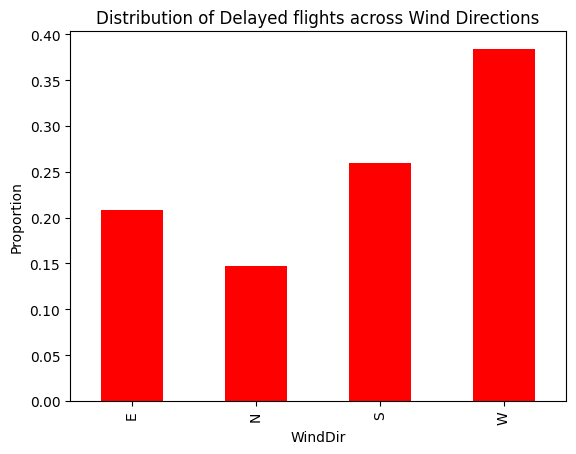

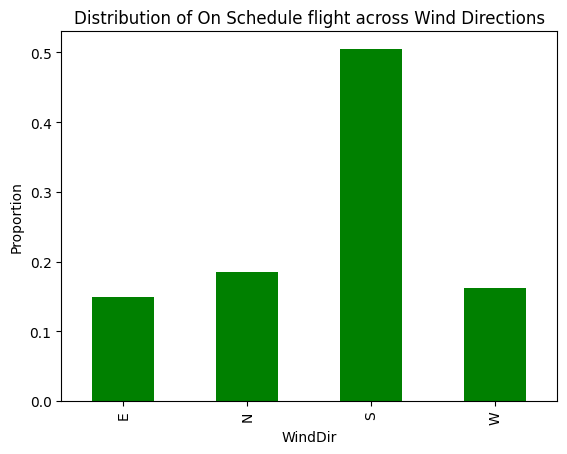

In [ ]:
# Group by WindDir and calculate delay proportions for Delayed = "yes"
delayed = df4[df4['Delayed'] == 'yes'].groupby('WindDir').size()/ len(df4[df4['Delayed'] == 'yes'])

# Plotting the bar chart for Delayed = "yes"
plt.figure()
delayed.plot(kind='bar', color='red',xlabel='WindDir',ylabel='Proportion', title='Distribution of Delayed flights across Wind Directions')
plt.show()

# Group by WindDir and calculate delay proportions for Delayed = "no"
on_schedule = df4[df4['Delayed'] == 'no'].groupby('WindDir').size()/ len(df4[df4['Delayed'] == 'no'])

# Plotting the bar chart for  On Schedule: Delayed = "no"
plt.figure()
on_schedule.plot(kind='bar', color='green',xlabel='WindDir',ylabel='Proportion', title='Distribution of On Schedule flight across Wind Directions')
plt.show()



*  Wind Directions "W" have a higher proportion of delayed flights ("yes" category), while Wind Directions "S" have a higher proportion of flights that arrived on schedule ("no" category).




### 6.The correlation of the numerical Delay against the other numerical variables

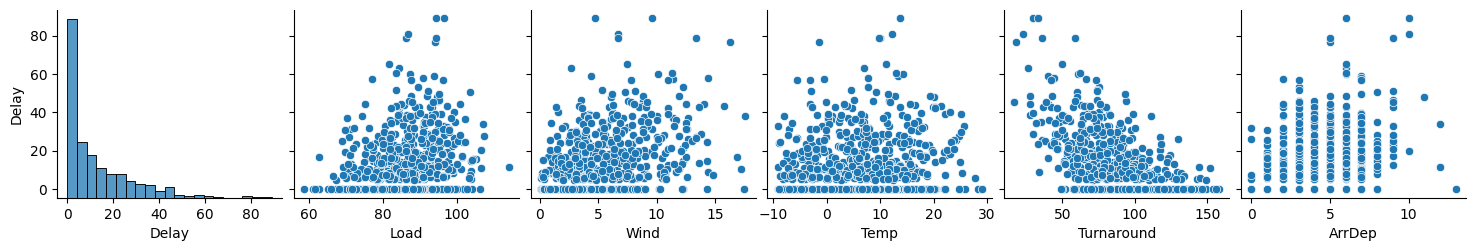

In [ ]:
seaborn.pairplot(df4,y_vars=['Delay'])#all possible scatterplots Delay against the other numerical variables


In [ ]:
# Examine correleation with variable Delay
corrmatrix = df4.corr().sort_values(by='Delay')
corrmatrix['Delay']

<ipython-input-70-220d937e694d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = df4.corr().sort_values(by='Delay')


Turnaround   -0.603857
Temp          0.160554
Load          0.265579
ArrDep        0.376842
Wind          0.463693
Delay         1.000000
Name: Delay, dtype: float64

<Axes: >

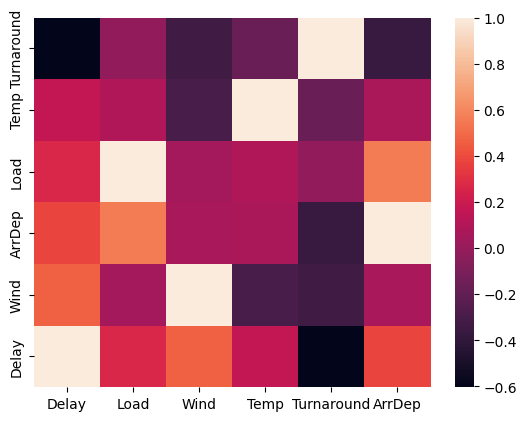

In [ ]:
seaborn.heatmap(corrmatrix)# correlation matrix into a heatmap

*   Variable  "Wind" has the strongest positive correlation(correlation coefficient of 0.46). This means higher wind speeds might lead to flight delays.
*    Variable "Turnaround" has the strongest negative correlation (correlation coefficient of -0.60). This suggests the longer turnaround allows for better scheduling, preparation, and maintenance, which can reduce the number of delays.

### 7.The cross-tabulation of category Delayed against a category that has a significant effect on the results.

WindDir   E   N    S    W
Delayed                  
no       45  56  153   49
yes      89  63  111  164 
 WindDir         E         N         S         W
Delayed                                        
no       0.148515  0.184818  0.504950  0.161716
yes      0.208431  0.147541  0.259953  0.384075


<Axes: xlabel='Delayed'>

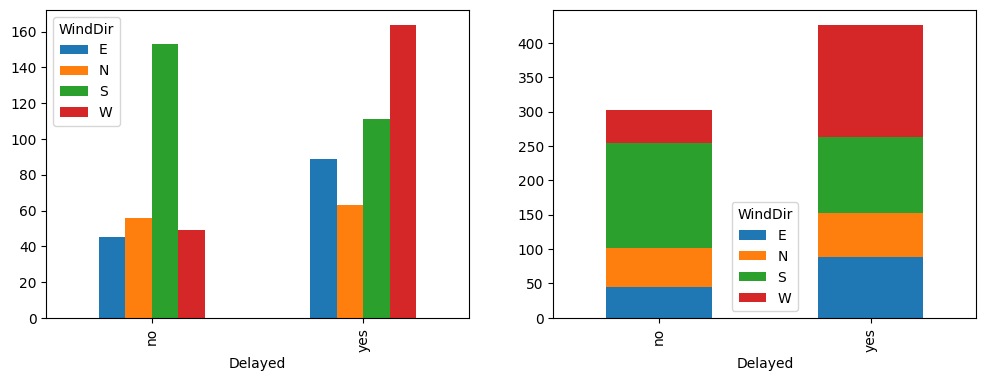

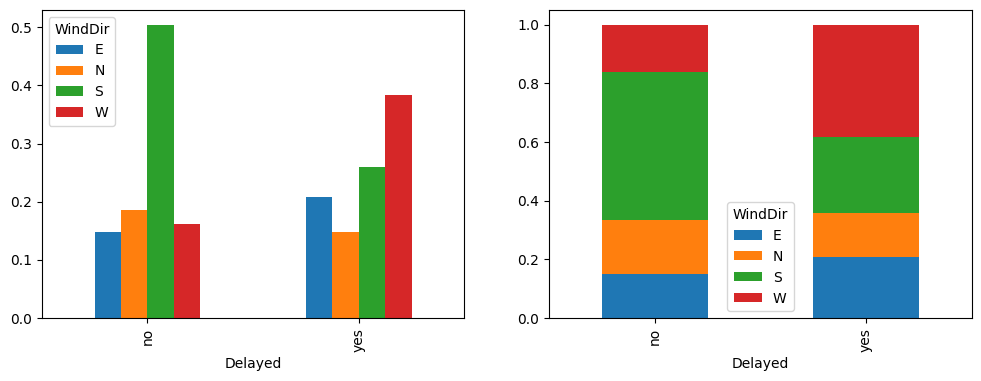

In [ ]:
# Task 7 Crosstablulaton of Delayed against WindDir
ct1 = pd.crosstab(df4['Delayed'], df4['WindDir'])
ct2 = pd.crosstab(df4['Delayed'], df4['WindDir'], normalize = 'index')
print(ct1, "\n", ct2)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ct1.plot.bar(ax = ax[0])
ct1.plot.bar(stacked = True, ax = ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ct2.plot.bar(ax = ax[0])
ct2.plot.bar(stacked = True, ax = ax[1])

*   Wind Directions "S" have a higher proportion of flights that arrived on schedule ("no" category), , while  Wind Directions "W" have a higher proportion of delayed flights ("yes" category).




Precip   none  rain  snowice
Delayed                     
no        196    86       21
yes       169   203       55 
 Precip       none      rain   snowice
Delayed                              
no       0.646865  0.283828  0.069307
yes      0.395785  0.475410  0.128806


<Axes: xlabel='Delayed'>

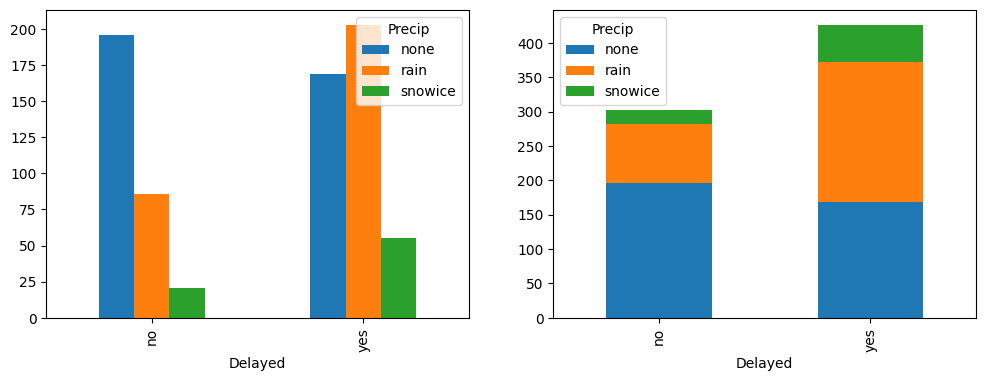

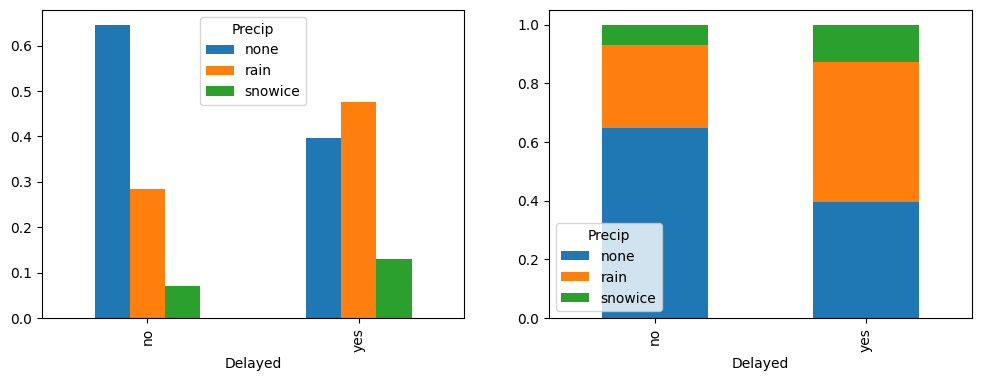

In [ ]:
# Task 7 Crosstablulaton of Delayed against Precip
ct1 = pd.crosstab(df4['Delayed'], df4['Precip'])
ct2 = pd.crosstab(df4['Delayed'], df4['Precip'], normalize = 'index')
print(ct1, "\n", ct2)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ct1.plot.bar(ax = ax[0])
ct1.plot.bar(stacked = True, ax = ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ct2.plot.bar(ax = ax[0])
ct2.plot.bar(stacked = True, ax = ax[1])

* "None Precip" have a higher proportion of flights that arrived on schedule ("no" category), , while  variable "Rain" have a higher proportion of delayed flights ("yes" category).




Terminal   T1   T2
Delayed           
no        144  159
yes       189  238 
 Terminal        T1        T2
Delayed                     
no        0.475248  0.524752
yes       0.442623  0.557377


<Axes: xlabel='Delayed'>

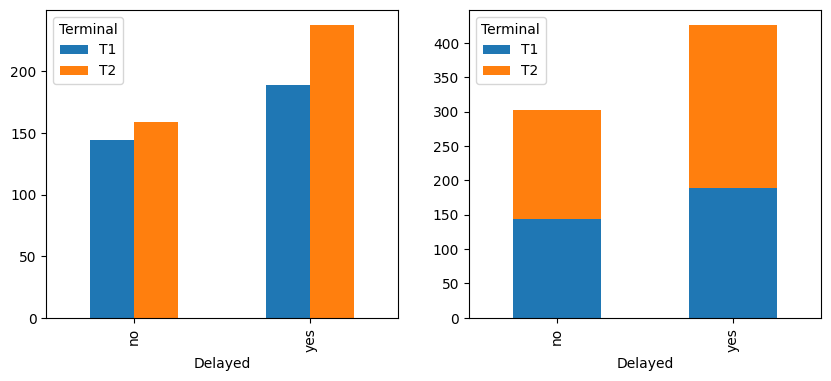

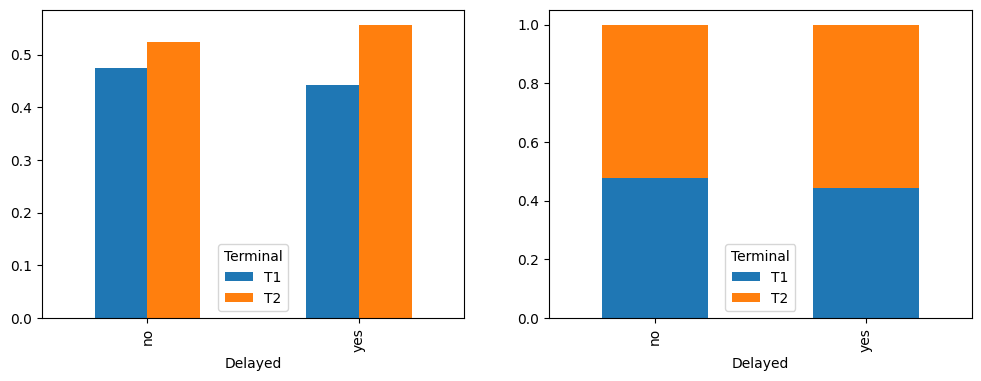

In [ ]:
# Task 7 Crosstablulaton of Delayed against Terminal
ct1 = pd.crosstab(df4['Delayed'], df4['Terminal'])
ct2 = pd.crosstab(df4['Delayed'], df4['Terminal'], normalize = 'index')
print(ct1, "\n", ct2)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ct1.plot.bar(ax = ax[0])
ct1.plot.bar(stacked = True, ax = ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ct2.plot.bar(ax = ax[0])
ct2.plot.bar(stacked = True, ax = ax[1])

* Variable "Terminal" does not have a significant effect on delayed flights

## Section 4 Data Transformation Tasks:

### 8.Create a scatterplot using the seaborn library that plots Delay against Wind with points coloured by the WindDir category for the delayedFlights data frame.

In [ ]:
delayedFlights=df4[df4['Delayed'] == 'yes']# create a new data frame where the Delayed value is yes
delayedFlights.head()

,Delay,Load,Wind,Temp,Turnaround,ArrDep,WindDir,Precip,Date,SchDepTime,Terminal,Delayed,Airport
0,31.3,71.3,12.60,-7.0,64,2,E,snowice,01-Jan-21,14:10,T2,yes,Aberdeen
2,16.2,88.3,3.45,-6.7,78,2,S,rain,03-Jan-21,06:55,T1,yes,Aberdeen
3,5.3,78.6,3.70,-8.2,69,4,S,snowice,04-Jan-21,06:55,T2,yes,Aberdeen
4,57.4,76.9,11.40,-0.6,66,2,W,snowice,05-Jan-21,14:10,T1,yes,Aberdeen
6,9.1,79.7,2.10,-3.2,75,4,S,snowice,07-Jan-21,20:15,T2,yes,Aberdeen


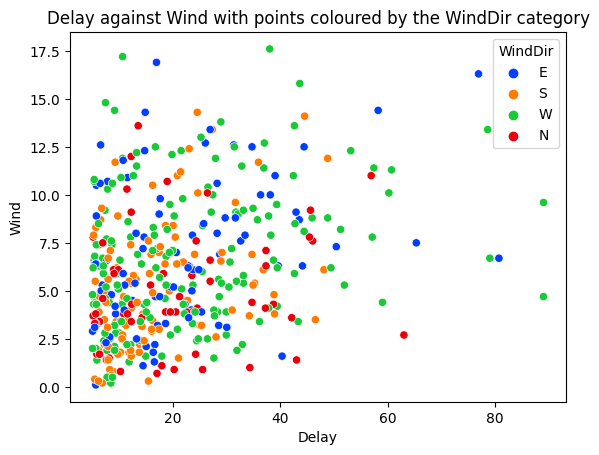

In [ ]:
seaborn.scatterplot(x = 'Delay', y='Wind', hue = 'WindDir', data = delayedFlights,palette='bright').set(title='Delay against Wind with points coloured by the WindDir category')
plt.show()

### 9.In the delayedFlights dataset create a new data column called Compensation.


### 9.(a) Adding a new column Compensation

In [ ]:
delayedFlights['Compensation,£'] = round(20 * delayedFlights['Delay'] / 60 * delayedFlights['Load'] * 120 / 100, 1)

delayedFlights.head()

<ipython-input-77-011d15b6810e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayedFlights['Compensation,£'] = round(20 * delayedFlights['Delay'] / 60 * delayedFlights['Load'] * 120 / 100, 1)


,Delay,Load,Wind,Temp,Turnaround,ArrDep,WindDir,Precip,Date,SchDepTime,Terminal,Delayed,Airport,"Compensation,£"
0,31.3,71.3,12.60,-7.0,64,2,E,snowice,01-Jan-21,14:10,T2,yes,Aberdeen,892.7
2,16.2,88.3,3.45,-6.7,78,2,S,rain,03-Jan-21,06:55,T1,yes,Aberdeen,572.2
3,5.3,78.6,3.70,-8.2,69,4,S,snowice,04-Jan-21,06:55,T2,yes,Aberdeen,166.6
4,57.4,76.9,11.40,-0.6,66,2,W,snowice,05-Jan-21,14:10,T1,yes,Aberdeen,1765.6
6,9.1,79.7,2.10,-3.2,75,4,S,snowice,07-Jan-21,20:15,T2,yes,Aberdeen,290.1


### 9.(b) Use the resulting Compensation column to calculate the total cost of Compensation over the two-year period represented by the data.

In [ ]:
#Total cost of Compensation over the two-year period
cost_compensation_total = delayedFlights['Compensation,£'].sum()
print('Total cost of Compensation over the two-year period,£: ', round(cost_compensation_total,))


Total cost of Compensation over the two-year period,£:  313949


In [ ]:
## Spit total compensation by year
delayedFlights['Date_f'] = pd.to_datetime(delayedFlights['Date']) #Process the Data in  a correct datatime type
delayedFlights.head()

<ipython-input-79-0e3ea3b8a654>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayedFlights['Date_f'] = pd.to_datetime(delayedFlights['Date']) #Process the Data in  a correct datatime type


,Delay,Load,Wind,Temp,Turnaround,ArrDep,WindDir,Precip,Date,SchDepTime,Terminal,Delayed,Airport,"Compensation,£",Date_f
0,31.3,71.3,12.60,-7.0,64,2,E,snowice,01-Jan-21,14:10,T2,yes,Aberdeen,892.7,2021-01-01
2,16.2,88.3,3.45,-6.7,78,2,S,rain,03-Jan-21,06:55,T1,yes,Aberdeen,572.2,2021-01-03
3,5.3,78.6,3.70,-8.2,69,4,S,snowice,04-Jan-21,06:55,T2,yes,Aberdeen,166.6,2021-01-04
4,57.4,76.9,11.40,-0.6,66,2,W,snowice,05-Jan-21,14:10,T1,yes,Aberdeen,1765.6,2021-01-05
6,9.1,79.7,2.10,-3.2,75,4,S,snowice,07-Jan-21,20:15,T2,yes,Aberdeen,290.1,2021-01-07


In [ ]:
# Extract the year from the 'Date' column
delayedFlights['Year'] = delayedFlights['Date_f'].dt.year
delayedFlights.head()

<ipython-input-80-f5a95a4dd74c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayedFlights['Year'] = delayedFlights['Date_f'].dt.year


,Delay,Load,Wind,Temp,Turnaround,ArrDep,WindDir,Precip,Date,SchDepTime,Terminal,Delayed,Airport,"Compensation,£",Date_f,Year
0,31.3,71.3,12.60,-7.0,64,2,E,snowice,01-Jan-21,14:10,T2,yes,Aberdeen,892.7,2021-01-01,2021
2,16.2,88.3,3.45,-6.7,78,2,S,rain,03-Jan-21,06:55,T1,yes,Aberdeen,572.2,2021-01-03,2021
3,5.3,78.6,3.70,-8.2,69,4,S,snowice,04-Jan-21,06:55,T2,yes,Aberdeen,166.6,2021-01-04,2021
4,57.4,76.9,11.40,-0.6,66,2,W,snowice,05-Jan-21,14:10,T1,yes,Aberdeen,1765.6,2021-01-05,2021
6,9.1,79.7,2.10,-3.2,75,4,S,snowice,07-Jan-21,20:15,T2,yes,Aberdeen,290.1,2021-01-07,2021


In [ ]:
# Calculate the total cost of Compensation for each year
cost_compensation_year = delayedFlights.groupby('Year')['Compensation,£'].sum()

# Create a DataFrame Compensation per Year,%
cost_compensation_year = pd.DataFrame({'Year': cost_compensation_year.index, 'Compensation,£': cost_compensation_year.values})
cost_compensation_year['Compensation,%'] = (cost_compensation_year['Compensation,£'] / cost_compensation_total) * 100
cost_compensation_year

,Year,"Compensation,£","Compensation,%"
0,2021,154267.2,49.137678
1,2022,159681.7,50.862322


*   The compensation for delays increased by 1% in 2022 instead of 2021.




### 10.(a) In delayedFlights transform Date and SchDepTime into a single column of type datetime called Departure


In [ ]:
delayedFlights['Date'] = delayedFlights['Date'].astype(str)
delayedFlights['SchDepTime'] = delayedFlights['SchDepTime'].astype(str)
dt = delayedFlights['Date'].str.cat(delayedFlights['SchDepTime'], sep=" ")
delayedFlights['datetime'] = pd.to_datetime(dt, format='%d-%b-%y %H:%M')
delayedFlights.head()

<ipython-input-82-88180d7928cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayedFlights['Date'] = delayedFlights['Date'].astype(str)
<ipython-input-82-88180d7928cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayedFlights['SchDepTime'] = delayedFlights['SchDepTime'].astype(str)
<ipython-input-82-88180d7928cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,Delay,Load,Wind,Temp,Turnaround,ArrDep,WindDir,Precip,Date,SchDepTime,Terminal,Delayed,Airport,"Compensation,£",Date_f,Year,datetime
0,31.3,71.3,12.60,-7.0,64,2,E,snowice,01-Jan-21,14:10,T2,yes,Aberdeen,892.7,2021-01-01,2021,2021-01-01 14:10:00
2,16.2,88.3,3.45,-6.7,78,2,S,rain,03-Jan-21,06:55,T1,yes,Aberdeen,572.2,2021-01-03,2021,2021-01-03 06:55:00
3,5.3,78.6,3.70,-8.2,69,4,S,snowice,04-Jan-21,06:55,T2,yes,Aberdeen,166.6,2021-01-04,2021,2021-01-04 06:55:00
4,57.4,76.9,11.40,-0.6,66,2,W,snowice,05-Jan-21,14:10,T1,yes,Aberdeen,1765.6,2021-01-05,2021,2021-01-05 14:10:00
6,9.1,79.7,2.10,-3.2,75,4,S,snowice,07-Jan-21,20:15,T2,yes,Aberdeen,290.1,2021-01-07,2021,2021-01-07 20:15:00


### 10(b)Hence create two new columns in delayedFlights representing the Month of the flight, and the Day of the Week of the flight.

In [ ]:
# Add column 'Month'
delayedFlights['Month'] = delayedFlights['Date_f'].dt.month
# Add column 'Day of the Week'
delayedFlights['Day'] = delayedFlights['Date_f'].dt.day
delayedFlights.head(20)

<ipython-input-83-2968d300cb68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayedFlights['Month'] = delayedFlights['Date_f'].dt.month
<ipython-input-83-2968d300cb68>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayedFlights['Day'] = delayedFlights['Date_f'].dt.day


,Delay,Load,Wind,Temp,Turnaround,ArrDep,WindDir,Precip,Date,SchDepTime,Terminal,Delayed,Airport,"Compensation,£",Date_f,Year,datetime,Month,Day
0,31.3,71.3,12.60,-7.0,64,2,E,snowice,01-Jan-21,14:10,T2,yes,Aberdeen,892.7,2021-01-01,2021,2021-01-01 14:10:00,1,1
2,16.2,88.3,3.45,-6.7,78,2,S,rain,03-Jan-21,06:55,T1,yes,Aberdeen,572.2,2021-01-03,2021,2021-01-03 06:55:00,1,3
3,5.3,78.6,3.70,-8.2,69,4,S,snowice,04-Jan-21,06:55,T2,yes,Aberdeen,166.6,2021-01-04,2021,2021-01-04 06:55:00,1,4
4,57.4,76.9,11.40,-0.6,66,2,W,snowice,05-Jan-21,14:10,T1,yes,Aberdeen,1765.6,2021-01-05,2021,2021-01-05 14:10:00,1,5
6,9.1,79.7,2.10,-3.2,75,4,S,snowice,07-Jan-21,20:15,T2,yes,Aberdeen,290.1,2021-01-07,2021,2021-01-07 20:15:00,1,7
7,76.9,94.1,16.30,-1.4,18,5,E,snowice,08-Jan-21,06:55,T1,yes,Aberdeen,2894.5,2021-01-08,2021,2021-01-08 06:55:00,1,8
8,9.4,73.1,3.40,3.3,56,3,S,rain,09-Jan-21,14:10,T2,yes,Aberdeen,274.9,2021-01-09,2021,2021-01-09 14:10:00,1,9
9,23.5,77.2,5.80,-1.7,69,5,N,snowice,10-Jan-21,20:15,T2,yes,Aberdeen,725.7,2021-01-10,2021,2021-01-10 20:15:00,1,10
10,9.3,70.4,3.80,2.8,98,2,E,rain,11-Jan-21,14:10,T2,yes,Aberdeen,261.9,2021-01-11,2021,2021-01-11 14:10:00,1,11
13,31.7,72.2,9.10,7.9,91,0,W,rain,14-Jan-21,14:10,T1,yes,Aberdeen,915.5,2021-01-14,2021,2021-01-14 14:10:00,1,14


## Section 5 Data Modelling Tasks:

### 11 (a,b) Create and evaluate a Linear regression model and Random Forest Regression Model to predict Delay

In [ ]:
#To convert a category into something numerical we can perform a one-hot encoding
encoded_df = pd.get_dummies(df4, columns=['WindDir', 'Precip'])
encoded_df.head()

,Delay,Load,Wind,Temp,Turnaround,ArrDep,Date,SchDepTime,Terminal,Delayed,Airport,WindDir_E,WindDir_N,WindDir_S,WindDir_W,Precip_none,Precip_rain,Precip_snowice
0,31.3,71.3,12.60,-7.0,64,2,01-Jan-21,14:10,T2,yes,Aberdeen,1,0,0,0,0,0,1
1,0.0,62.6,3.20,-5.2,98,0,02-Jan-21,14:10,T1,no,Aberdeen,0,0,1,0,1,0,0
2,16.2,88.3,3.45,-6.7,78,2,03-Jan-21,06:55,T1,yes,Aberdeen,0,0,1,0,0,1,0
3,5.3,78.6,3.70,-8.2,69,4,04-Jan-21,06:55,T2,yes,Aberdeen,0,0,1,0,0,0,1
4,57.4,76.9,11.40,-0.6,66,2,05-Jan-21,14:10,T1,yes,Aberdeen,0,0,0,1,0,0,1


In [ ]:
## Check which variables infuence the Delay most?
encoded_df.corrwith(encoded_df['Delay'], method = 'spearman').sort_values()


<ipython-input-85-ee421c882f0a>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  encoded_df.corrwith(encoded_df['Delay'], method = 'spearman').sort_values()


Turnaround       -0.612668
Precip_none      -0.304590
WindDir_S        -0.276249
WindDir_N        -0.045769
WindDir_E         0.083681
Precip_snowice    0.089948
Temp              0.160999
Precip_rain       0.255243
WindDir_W         0.257911
Load              0.298761
ArrDep            0.377912
Wind              0.509177
Delay             1.000000
dtype: float64

Based on the Spearman correlation coefficients between the variables and the "Delay" variable, here are the variables with the strongest relationships with predicting the "Delay": Load', 'Wind',  'Turnaround','Precip','WindDir'.

Variables 'Delayed',' Date' and 'Airport' should not be used as predictors because 'Delayed' is the target variable, 'Date' and 'Airport' are not meaningful patterns , for using we would need to extract more useful features such as the day or size, location of the airport.

In [ ]:
y = encoded_df['Delay']
## select the predictors
X = encoded_df[['ArrDep','Load', 'Wind', 'Turnaround','Precip_none','Precip_rain','Precip_snowice','WindDir_E','WindDir_N','WindDir_S','WindDir_W']]
## select the predictors
X_scaled = scale(X, axis=0)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns + "_std")

## Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.7, random_state=999)

## ## Performing a LinearRegression Model
lr = LinearRegression()
model = lr.fit(X_train,y_train)
import sklearn.metrics as metrics
y_pred = model.predict(X_test)
print("Linear Regression")
print("R^2 = ", metrics.r2_score(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))

## Performing a Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
RFmodel = rf.fit(X_train,y_train)
y_pred = RFmodel.predict(X_test)

print("\nRandom Forest")
print("R^2 = ", metrics.r2_score(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))


Linear Regression
R^2 =  0.6459234868136601
MSE =  96.98336092304814
MAE =  7.284444650798616

Random Forest
R^2 =  0.6815681040813302
MSE =  87.22011864999999
MAE =  6.5761863636363636


Comparing the two models, the Random forest model provides slightly more accurate predictions than the linear regression model. The Random forest model is able to explain around 68% of the variance in the delay variable.

The MSE and MAE values measure the average squared and absolute differences, respectively, between predicted and actual delays. For the Random Forest model, the MSE is 87.2, and the MAE is 6.57. These values indicate that, on average, the predictions made by the Random Forest model are reasonably close to the actual delay values.

###  12.Apply two classification models of your choice (that were covered in the CM3400 course) to predict the value of the category Delayed. Evaluate the results using confusion matrices and relevant metrics.


<Axes: >

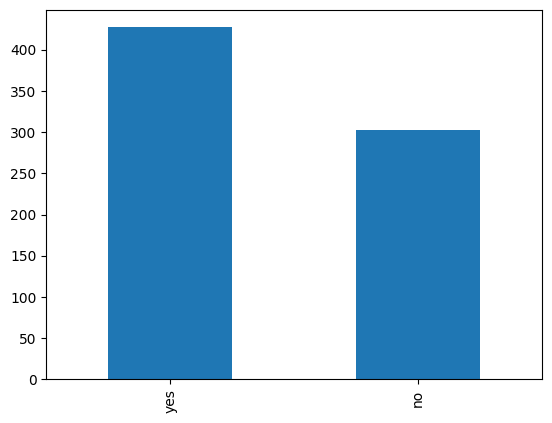

In [ ]:
## Examine the distribution of the target variable, which is species
encoded_df['Delayed'].value_counts().plot.bar()

In [ ]:
y = encoded_df['Delayed']
## select the predictors
X= encoded_df[['ArrDep','Load', 'Wind', 'Temp', 'Turnaround','WindDir_E','WindDir_N','WindDir_S','WindDir_W','Precip_none','Precip_rain','Precip_snowice']]

# One-hot encode the categorical predictor
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.7, random_state=999)

tree = DecisionTreeClassifier()
model = tree.fit(Xtrain,ytrain) ;
y_pred = model.predict(Xtest)
print("decision tree")
print("accuracy(on test set) = ", metrics.accuracy_score(ytest, y_pred))
print("Confusion Matrix = \n ", metrics.confusion_matrix(ytest, y_pred))

rf = RandomForestClassifier()
rfmodel = rf.fit(Xtrain,ytrain)
y_pred = rfmodel.predict(Xtest)
print("Random Forest")
print("accuracy(on test set) = ", metrics.accuracy_score(ytest, y_pred))
print("Confusion Matrix = \n", metrics.confusion_matrix(ytest, y_pred))

decision tree
accuracy(on test set) =  0.7475538160469667
Confusion Matrix = 
  [[152  54]
 [ 75 230]]
Random Forest
accuracy(on test set) =  0.8258317025440313
Confusion Matrix = 
 [[164  42]
 [ 47 258]]


The Random Forest model performs better with a higher accuracy of 82% compared to 74% of the Decision Tree model .

The Random Forest model is better at correctly classifying both positive and negative instances. It has fewer false positives (42 vs. 54) and fewer false negatives (47 vs. 75).

## Section 6 Professional, legal and ethical considerations Tasks:

In case an airline wants to combine its dataset with personal data gathered from registered customers to develop a flight delay prediction model and send personalized emails with compensation offers, the legal framework governing the use of personal data would involve multiple regulations:

-UK Data Protection Act 2018 and the UK General Data Protection Regulation (UK GDPR)-used in the UK.

-California Consumer Privacy Act (CCPA) and other federal data protection laws for USA-located customers.

-General Data Protection Regulation (GDPR) applies when processing personal data of individuals located in the European Union.

The airline must yield specific measures to arrange legal compliance.

These include: obtaining permission from customers, protecting data security and confidentiality, and providing clear information about data processing. Ethical use of data is no less important already.
There are frameworks and guidelines that exist for assessing ethical issues and for providing codes of good practice. For example Open Data Institute, Data Ethics Framework-guidance for public sector organisations on how to use data appropriately and responsibly when planning, implementing, and evaluating a new policy or service.

For non-compliance  with the relevant laws can result in  serious financial penalties and reputational risk.

Therefore, it is important for the airline to follow the specific legal requirements in each step of collecting and processing data.
